### Remuestreo Bootstrap

Para este ejercicio debemos diseñar una función que estime la varianza de una variable aleatoria a partir de una muestra de datos. Luego debemos implementar una función que utilice boostrap resampling para calcular los intervalos de confidencia del estimador de la varianza a un nivel de significancia dado $\alpha$.

Como muestra tenemos los datos de las magnitudes de un cúmulo en un archivo .dat, por lo que vamos a comenzar cargandolo a nuestro notebook.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = np.genfromtxt('cumulos_globulares.dat', usecols=6)

In [3]:
data = data[~np.isnan(data)]      #solo usaremos los datos numéricos

Calculamos la varianza muestral, usando que:

<center>
$\bar{x_j} = \sum_{i=1}^{j} \frac{x_i}{j}$
</center>
y

<center>
$s_j^2 = \frac{1}{n-1} \sum_{i=1}^{j} (x_i -\bar{x_j})^2 $
</center>

donde $\bar{x_j}$ es la media muestral y $s_j^2$ es la varianza muestral

Calculamos la media muestral usando el paquete de NumPy

In [4]:
media = np.mean(data)
print(media)

-7.027027027027027


In [5]:
n = (1/(len(data)-1))   #calculamos el factor 1/(n-1)
suma = 0

def varianza(n,data):
    for i in range(len(data)):
        d = (data[i]-media)**2
        global suma
        suma = suma + d
    varianza=n*suma
    return(varianza)


In [6]:
varianza(n,data)

2.225189740761169

Ahora generamos los remuestreos con la lista data, calculamos las varianzas de cada lista y hacemos un histograma

In [23]:
m = 1e4
m = int(m)
lista_v = []
suma = 0

def varianza(n,lista,media_v):
    for i in range(len(lista)):
        d = (lista[i]-media_v)**2
        global suma
        suma = suma + d
    varianza=n*suma
    return(varianza)

for k in range(m):
    
    suma = 0
    
    lista = np.random.choice(data, replace= 'True',size=148)
    
    media_v = np.mean(lista)
    
    n = (1/(len(lista)-1))   
        
    lista_v.append(varianza(n,lista,media_v))

Text(0.5, 0, 'Varianza muestral')

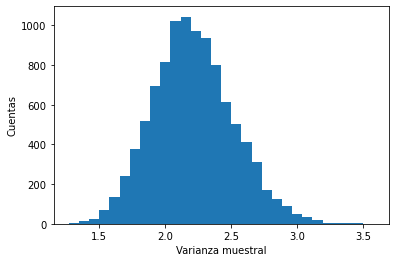

In [24]:
plt.hist(lista_v, bins = 30)
plt.ylabel('Cuentas')
plt.xlabel('Varianza muestral')

Vemos que la distribución que se forma de calcular la varianza a cada remuestreo es similar a una distribución normal, que es justamente lo que esperamos por el Teorema del Límite Central. En este caso, se puede notar que la media cae muy cerca del valor que habíamos calculado como varianza de los datos.

Veamos ahora de definir una función que nos devuelva los límites de los intervalos de confianza para dado $\alpha$ y una lista, que podrá ser la que contruimos con el remuestro Bootstrap

In [30]:
lista_v.sort()

In [42]:
def int_confianza(alpha,lista_v):
    q1 = alpha/2
    q2 = 1-(alpha/2)
    
    for i in range(len(lista_v)):
        f = i/len(lista_v)
        if f >= q1:
            ic_izquierda = lista_v[i]
            break 
            
    for j in range(len(lista_v)):
        g = j/len(lista_v)
        if g >= q2:
            ic_derecha = lista_v[j]
            break
    return(ic_izquierda, ic_derecha)    

Veamos si funciona bien: Con una lista de 100 elemenos ordenados de menor a mayor, los límites deberán ser 25 (izquierda) y 75 (derecha)

In [1]:
lista_ejemplo = range(100)

In [47]:
int_confianza(0.5, lista_ejemplo)

(25, 75)